In [3]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns

In [4]:
data = pd.read_csv('bank_with_missing.csv')
print("Dataset preview:")
data.head()

Dataset preview:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,NaN,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72.0,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37.0,entrepreneur,married,secondary,no,2971.0,no,no,cellular,17,nov,361,2,188,11,other,no


In [6]:
data.dtypes

,0
age,float64
job,object
marital,object
education,object
default,object
balance,float64
housing,object
loan,object
contact,object
day,int64


In [7]:
data.isnull().sum()

,0
age,100
job,120
marital,0
education,0
default,0
balance,80
housing,0
loan,0
contact,0
day,0


In [8]:
data.shape

(45211, 17)

In [9]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45111 non-null  float64
 1   job        45091 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  object 
 5   balance    45131 non-null  float64
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    45211 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45211 non-null  object 
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  object 
 16  y          45211 non-null  object 
dtypes: float64(2), int64(5), object(10)
memory usage: 5.9+ MB


In [11]:
data['age'] = data['age'].fillna(data['age'].mean())
display(data.isnull().sum())

,0
age,0
job,120
marital,0
education,0
default,0
balance,80
housing,0
loan,0
contact,0
day,0


In [12]:
data['job'] = data['job'].fillna(data['job'].mode()[0])
display(data.isnull().sum())

,0
age,0
job,0
marital,0
education,0
default,0
balance,80
housing,0
loan,0
contact,0
day,0


In [13]:
data.dropna(subset=['balance'], inplace=True)
display(data.isnull().sum())

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [14]:
data.shape

(45131, 17)

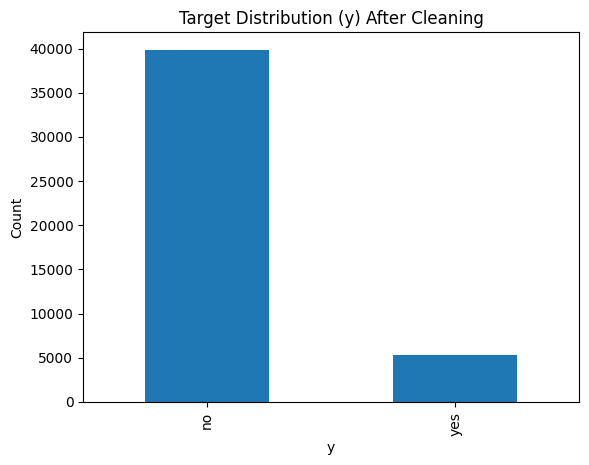

In [15]:
plt.figure()
data['y'].value_counts().plot(kind='bar')
plt.title("Target Distribution (y) After Cleaning")
plt.xlabel("y")
plt.ylabel("Count")
plt.show()

In [16]:
label_encoder = LabelEncoder()
data['y'] = label_encoder.fit_transform(data['y'])
display(data['y'].value_counts())

,count
y,
0,39856
1,5275


In [17]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.000000,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44.000000,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33.000000,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47.000000,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,40.937399,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [18]:
x_raw = data.drop(['y'], axis=1)
y = data['y']
x = pd.get_dummies(x_raw, drop_first=True)
x = x.astype(int)

In [19]:
x.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,40,1,5,198,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify=y)

In [21]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((36104, 42), (9027, 42), (36104,), (9027,))

In [22]:
scaler = StandardScaler(with_mean=False)
x_train_np = x_train.values.astype(float)
x_test_np = x_test.values.astype(float)

scaler.fit(x_train_np)
x_train_sc = scaler.transform(x_train_np)
x_test_sc = scaler.transform(x_test_np)

print("\n[Scaling] Completed (fit on train , applied to test)")


[Scaling] Completed (fit on train , applied to test)


In [23]:
x_train_sc[0:5]

array([[ 2.54768914,  0.7311342 ,  1.91907551,  0.5099265 ,  0.32412598,
         3.22784369,  0.41681223,  2.41357347,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  2.04398952,  0.        ,
         2.00100126,  0.        ,  0.        ,  0.        ,  2.01252676,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  5.13070116,
         0.        ,  0.        ],
       [ 3.963072  ,  0.82947192,  3.11849771,  0.71781961,  0.64825195,
        -0.00999332,  0.        ,  0.        ,  0.        ,  0.        ,
         2.46764259,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  2.04398952,  0.        ,
         0.        ,  2.199974  ,  0.        ,  0.        ,  0.        ,
         0.     

In [24]:
model = LogisticRegression(max_iter = 1000, random_state= 42)
model.fit(x_train_sc, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [25]:
y_pred_test = model.predict(x_test_sc)

In [26]:
y_prob_test = model.predict_proba(x_test_sc)[:,1]

In [27]:
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)

Accuracy: 0.9008529965658579


In [28]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

Confusion Matrix:
 [[7738  234]
 [ 661  394]]


In [29]:
print(classification_report(y_test,y_pred_test, digits=3))
print("\n---\n")

              precision    recall  f1-score   support

           0      0.921     0.971     0.945      7972
           1      0.627     0.373     0.468      1055

    accuracy                          0.901      9027
   macro avg      0.774     0.672     0.707      9027
weighted avg      0.887     0.901     0.890      9027


---



In [30]:
y_pred_proba = model.predict_proba(x_test_sc)[:, 1]

In [31]:
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc_score:.3f}")

AUC Score: 0.905


In [32]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

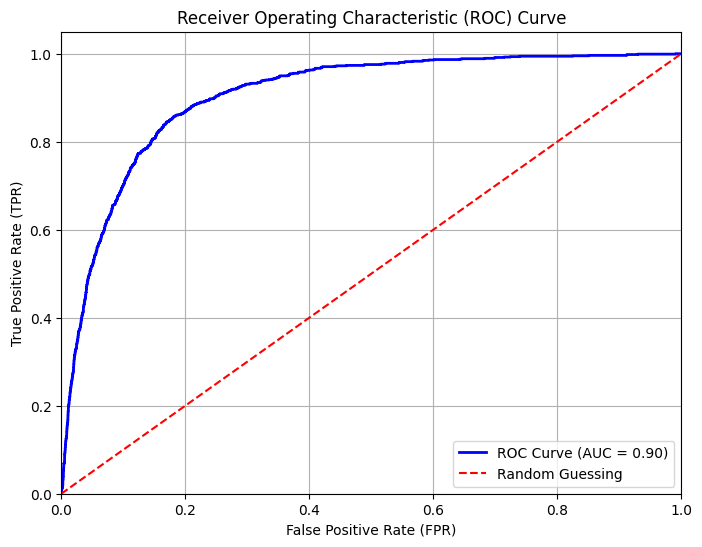

In [33]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2,
         label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [34]:
clf_gini= DecisionTreeClassifier(criterion='gini',max_depth=5, random_state=0)

In [35]:
clf_gini.fit(x_train_sc, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [36]:
y_pred_gini = clf_gini.predict(x_test_sc)

In [37]:
print('Model accuracy with gini index: {0:0.4f}'. format(accuracy_score(y_test,y_pred_gini)))

Model accuracy with gini index: 0.8995


In [38]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7972
           1       0.62      0.36      0.46      1055

    accuracy                           0.90      9027
   macro avg       0.77      0.67      0.70      9027
weighted avg       0.89      0.90      0.89      9027



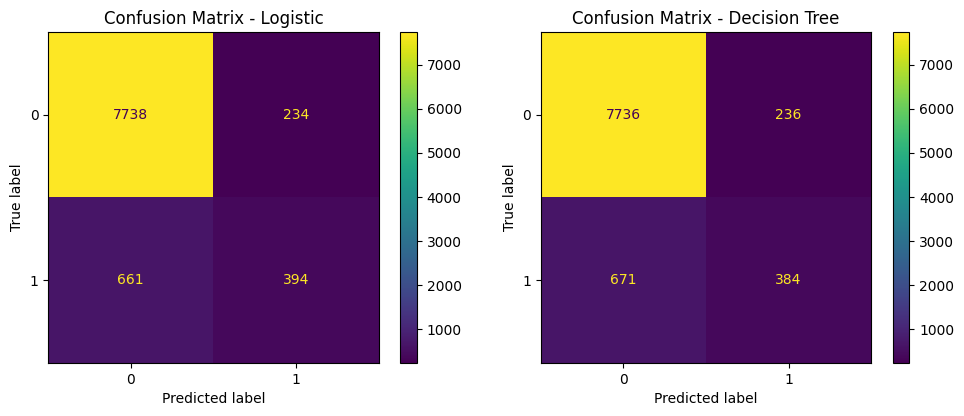

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, ax=axs[0])
axs[0].set_title("Confusion Matrix - Logistic")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_gini, ax=axs[1])
axs[1].set_title("Confusion Matrix - Decision Tree")
plt.tight_layout()
plt.show()

In [40]:
y_pred_proba = clf_gini.predict_proba(x_test_sc)[:, 1]

In [41]:
fpr_t, tpr_t, thresholds = roc_curve(y_test, y_pred_proba)

In [42]:
auc_t = roc_auc_score(y_test, y_pred_proba)

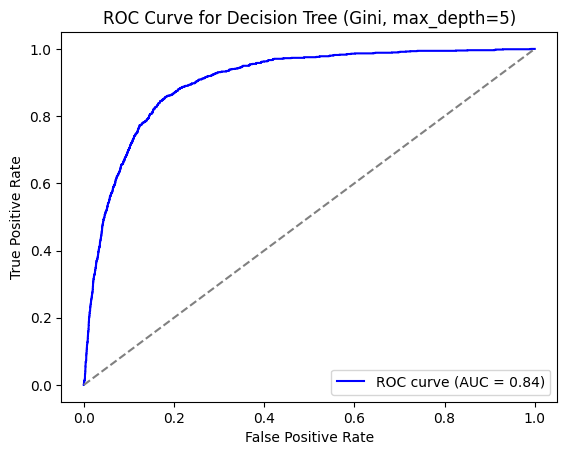

In [43]:
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_t:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Chance line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree (Gini, max_depth=5)')
plt.legend(loc='lower right')
plt.show()

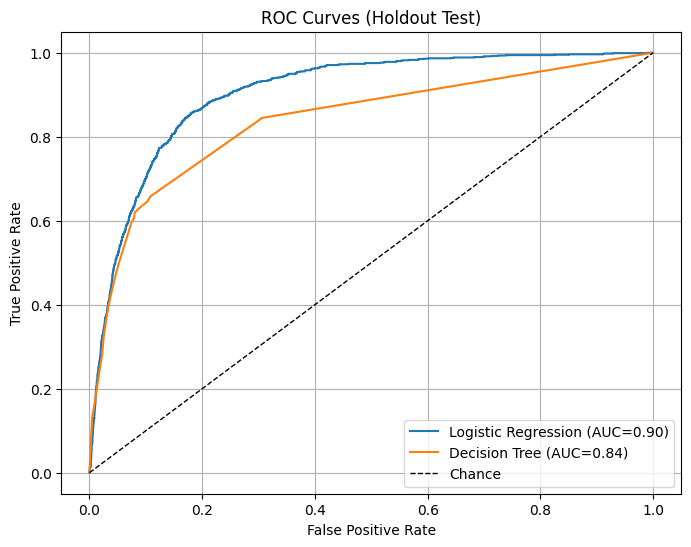

In [44]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC={auc_score:.2f})')
plt.plot(fpr_t, tpr_t, label=f'Decision Tree (AUC={auc_t:.2f})')
plt.plot([0,1],[0,1],'k--',linewidth=1,label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (Holdout Test)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()